# MHW Evolution

### Summary

This notebook generates Figure 10 depicting the evolution of a September MHW in the Chesapeake Bay.

### Outputs

- Figure 10

In [1]:
from pathlib import Path

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
SAVE_FIGS = False
REPO_ROOT = Path('/Users/rwegener/repos/chesapeake_mhw')

In [3]:
clim = xr.open_dataarray(
    REPO_ROOT / 'data/interim' / 'geopolar_climatology_chesapeake.nc'
)

thresh = xr.open_dataarray(
    REPO_ROOT / 'data/interim' / 'geopolar_threshold_chesapeake.nc'
)

path = (
    REPO_ROOT / 'data/raw' / 
    'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20230831.nc'
)
geopolar = xr.open_dataset(path).analysed_sst

In [4]:
# convert to celsius
geopolar = geopolar - 273.15

In [5]:
anom = geopolar - clim
mhw_spikes = anom.where(geopolar > thresh)
mhw_spikes = mhw_spikes.rename('anom_mhspikes')
mhw_spikes.attrs['units'] = 'Kelvin'

Format DataArray to generate desired axes.

In [6]:
mhw_spikes.name = 'SST Anomaly'
mhw_spikes.attrs['units'] = 'Celsius'

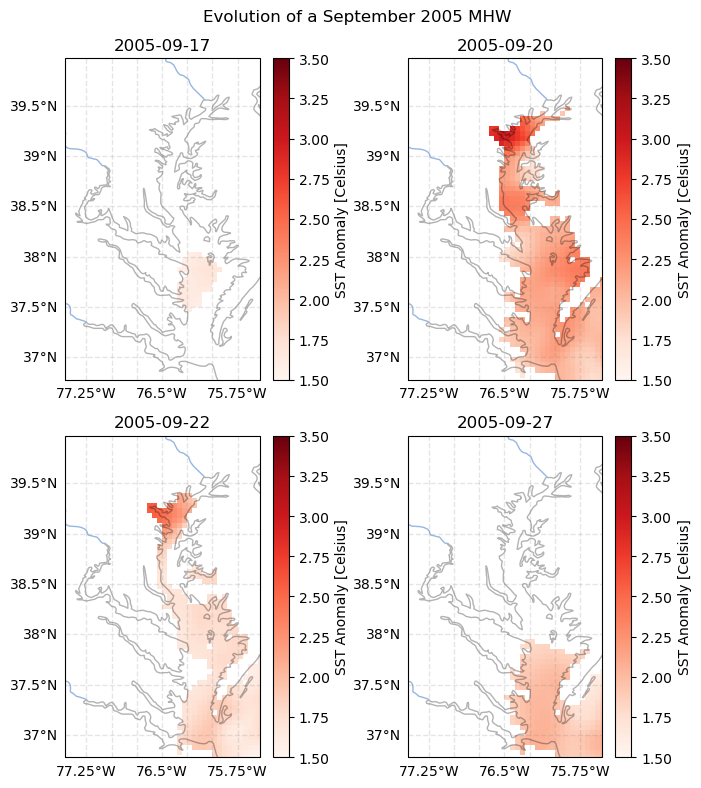

In [10]:
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(7, 8)
fig.suptitle('Evolution of a September 2005 MHW')

# Add background features
for ax in axes.flatten():
    ax.add_feature(cfeature.COASTLINE, alpha=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.RIVERS)

    ax.set_extent([-77.46, -75.53, 36.78, 39.97])

    # Add and format gridlines. Remove top and right labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='--')
    gl.top_labels, gl.right_labels = False, False
    
# Add anomaly data
vmin, vmax = 1.5, 3.5
date = '2005-09-17'
mhw_spikes.sel(time=date).plot(ax=axes[0, 0], cmap='Reds', vmin=vmin, vmax=vmax)
axes[0, 0].set_title(date)

date = '2005-09-20'
mhw_spikes.sel(time=date).plot(ax=axes[0, 1], cmap='Reds', vmin=vmin, vmax=vmax)
axes[0, 1].set_title(date)

date = '2005-09-22'
mhw_spikes.sel(time=date).plot(ax=axes[1, 0], cmap='Reds', vmin=vmin, vmax=vmax)
axes[1, 0].set_title(date)

date = '2005-09-27'
p = mhw_spikes.sel(time=date).plot(ax=axes[1, 1], cmap='Reds', vmin=vmin, vmax=vmax)
axes[1, 1].set_title(date)


plt.tight_layout()

if SAVE_FIGS: 
    plt.savefig(REPO_ROOT / 'figures/03_marineheatwaves' / 'evolution_2005.png', 
                bbox_inches='tight', dpi=400)